# 1. Introduction
Name : Muhammad Erico Ricardo

Dataset Link : https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset?resource=download



### **Description**

The **Global Coffee Health Dataset** contains **10,000 synthetic records** designed to reflect real-world patterns of **coffee consumption, sleep behavior, and health outcomes** across **20 countries**.

The dataset covers a wide range of lifestyle and health-related attributes, including demographics, daily coffee intake, caffeine levels, sleep duration and quality, BMI, heart rate, stress, physical activity, health issues, occupation, smoking, and alcohol consumption.

It is constructed to capture **realistic correlations observed in research**—such as caffeine’s impact on sleep, stress, and overall health—making it highly suitable for:

* **Statistical analysis**
* **Predictive modeling**
* **Lifestyle and wellness studies**

---



### **Usage & Insights**

This dataset can be applied in various domains, including health informatics, wellness research, and behavioral studies. Example use cases include:

* Exploring correlations between **coffee intake, sleep quality, and health outcomes**.
* Analyzing **lifestyle factors** such as physical activity, smoking, and alcohol consumption.
* Building **predictive models** for sleep quality, stress levels, or potential health risks.
* Comparing **demographic and country-level trends** in caffeine consumption.
* Serving as a **benchmark dataset** for research in wellness, lifestyle, or health analytics.

---



# 2. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans






# 3. Data Loading

In [2]:
data = pd.read_csv('synthetic_coffee_health_10000.csv')
data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### **Columns / Features**

| Column                        | Type        | Description                                                 |
| ----------------------------- | ----------- | ----------------------------------------------------------- |
| **ID**                        | Integer     | Unique record ID (1–10,000)                                 |
| **Age**                       | Integer     | Age of participant (18–80 years)                            |
| **Gender**                    | Categorical | Male, Female, Other                                         |
| **Country**                   | Categorical | Country of residence (20 countries)                         |
| **Coffee\_Intake**            | Float       | Daily coffee consumption in cups (0–10)                     |
| **Caffeine\_mg**              | Float       | Estimated daily caffeine intake in mg (1 cup ≈ 95 mg)       |
| **Sleep\_Hours**              | Float       | Average hours of sleep per night (3–10)                     |
| **Sleep\_Quality**            | Categorical | Poor, Fair, Good, Excellent (based on sleep hours)          |
| **BMI**                       | Float       | Body Mass Index (15–40)                                     |
| **Heart\_Rate**               | Integer     | Resting heart rate (50–110 bpm)                             |
| **Stress\_Level**             | Categorical | Low, Medium, High (based on sleep and lifestyle)            |
| **Physical\_Activity\_Hours** | Float       | Weekly physical activity (0–15 hours)                       |
| **Health\_Issues**            | Categorical | None, Mild, Moderate, Severe (based on age, BMI, and sleep) |
| **Occupation**                | Categorical | Office, Healthcare, Student, Service, Other                 |
| **Smoking**                   | Boolean     | 0 = No, 1 = Yes                                             |
| **Alcohol\_Consumption**      | Boolean     | 0 = No, 1 = Yes                                             |


# 4. Exloratory Data Analysis

## 4.1 Age distribution from data


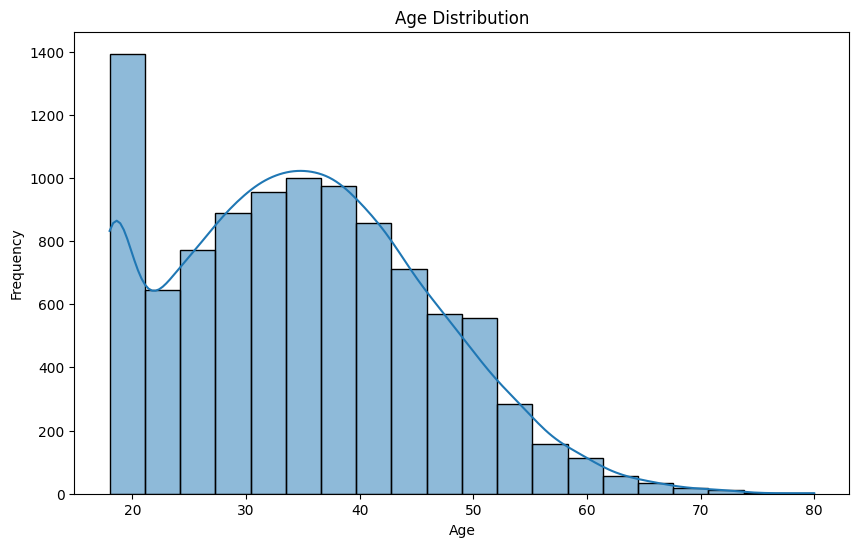

In [4]:
## 4.1 create a histogram chart about age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Majority are **20–40 years old**.
* Few participants above 60 → younger adult population.

## 4.2 Gender Distribution

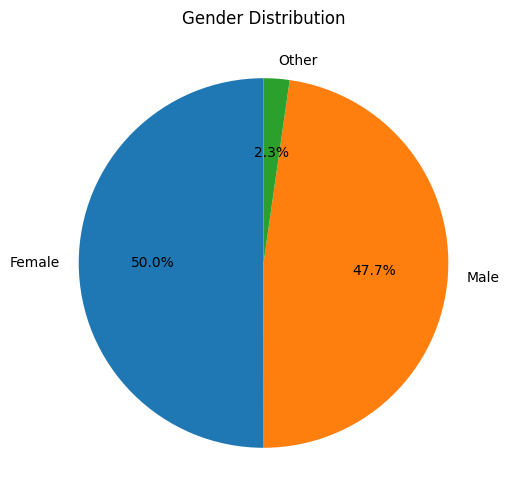

In [5]:
# Create pie chart to see gender distribution of the data
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

  * Very balanced: **Female 50%**, **Male 47.7%**, **Other 2.3%** → no major gender bias.

## 4.3 Country distribution of the data

Text(0, 0.5, 'Country')

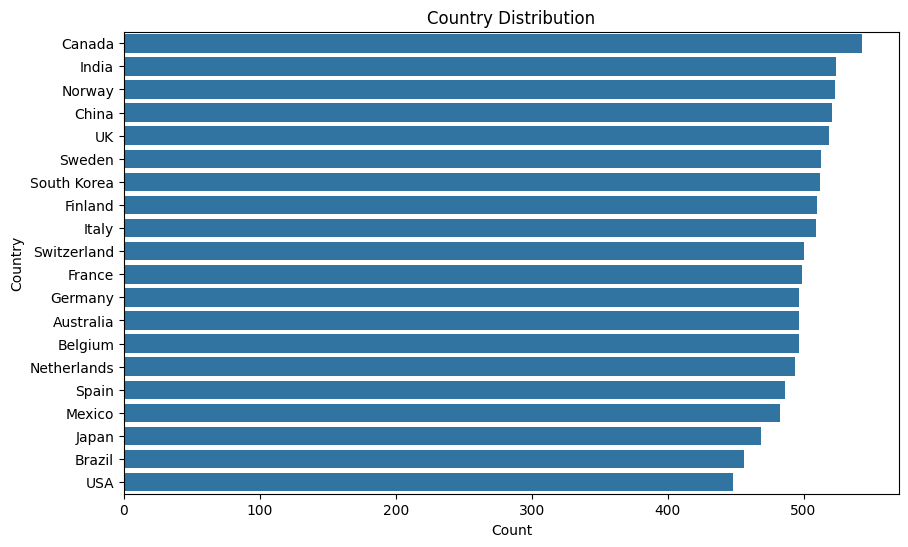

In [6]:
# Create horizontal bar to see country distribution
country_counts = data['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, orient='h')
plt.title('Country Distribution')
plt.xlabel('Count')
plt.ylabel('Country')

   * Participants from **20 countries**.
   * Highest counts: **Canada, India, Norway, China** → dataset has global representation.

## 4.4 Coffe Intake Distribution from data

Text(0, 0.5, 'Frequency')

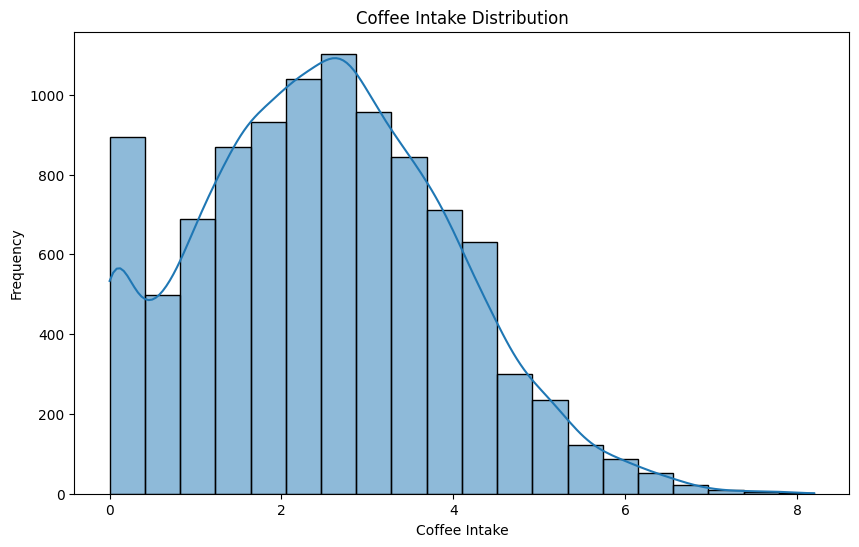

In [7]:
# Create histogram to see intake distribution of the data
plt.figure(figsize=(10, 6))
sns.histplot(data['Coffee_Intake'], bins=20, kde=True)
plt.title('Coffee Intake Distribution')
plt.xlabel('Coffee Intake')
plt.ylabel('Frequency')

   * Peak at **2–3 cups/day**.
   * Many consume **0 cups**.
   * Very few consume more than 4 cups → moderate habits overall.

## 4.5 Sleep hour distribution from data

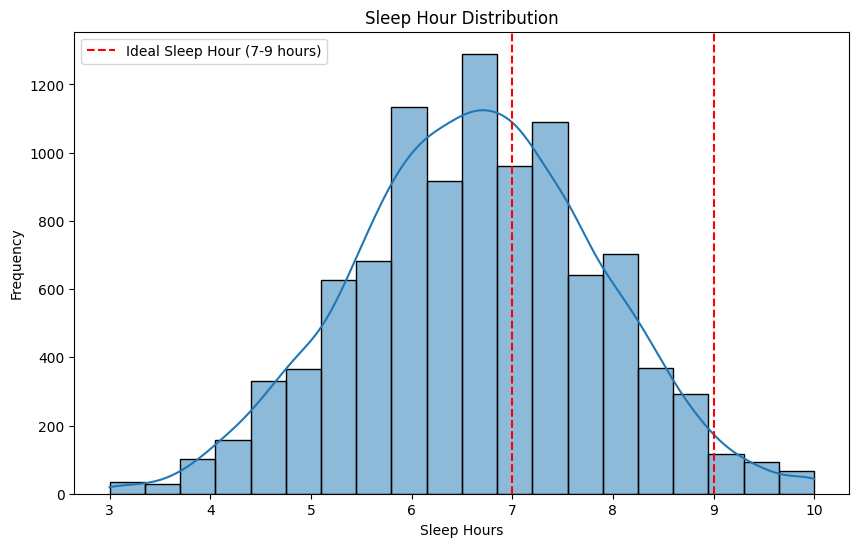

In [8]:
# create histogram to see sleep hour distribution from data and mark ideal sleep hour 7-9 hour
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep_Hours'], bins=20, kde=True)
plt.axvline(x=7, color='r', linestyle='--', label='Ideal Sleep Hour (7-9 hours)')
plt.axvline(x=9, color='r', linestyle='--')
plt.title('Sleep Hour Distribution')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.legend()


   * Most participants sleep **6–8 hours**, close to the recommended 7–9 hours.
   * Peak is slightly below 7 hours → many sleep less than ideal.

## 4.6 Create BMI distribution

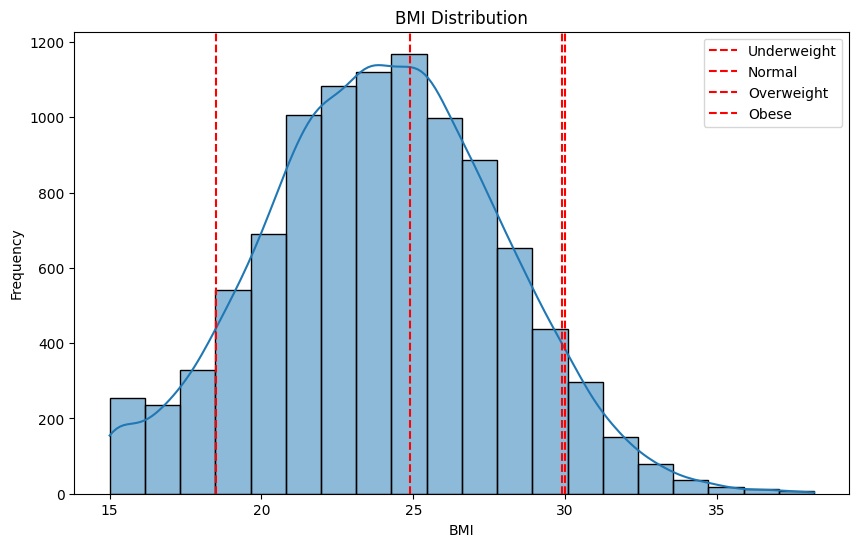

In [9]:
#Create BMI distribution and Tambahkan garis batas WHO kategori BMI: <18.5 (Underweight), 18.5–24.9 (Normal), 25–29.9 (Overweight),≥30 (Obese).
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=20, kde=True)
plt.axvline(x=18.5, color='r', linestyle='--', label='Underweight')
plt.axvline(x=24.9, color='r', linestyle='--', label='Normal')
plt.axvline(x=29.9, color='r', linestyle='--', label='Overweight')
plt.axvline(x=30, color='r', linestyle='--', label='Obese')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()


   * Peak BMI around **24–25 (Normal range)**.
   * Noticeable proportion of **Overweight (25–30)** and **Underweight (<18.5)**.
   * Fewer cases of **Obesity (>30)**.


## 4.7 Create Heart Rate Distribution

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

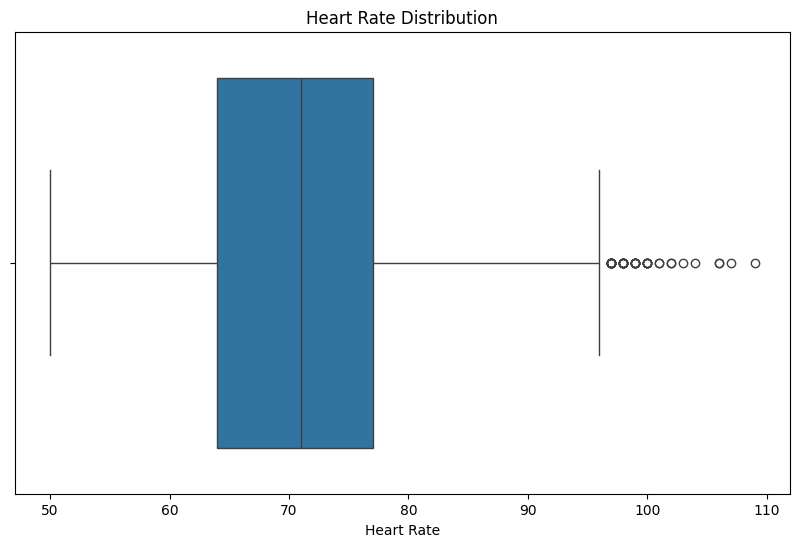

In [10]:
# Create boxplot to see heart rate distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Heart_Rate'])
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt

   * Median around **72 bpm** (healthy).
   * Most within **65–78 bpm**, but some **high outliers** exist.

## 4.8 Phisical Activity x Occupation Distribution

Text(0, 0.5, 'Occupation')

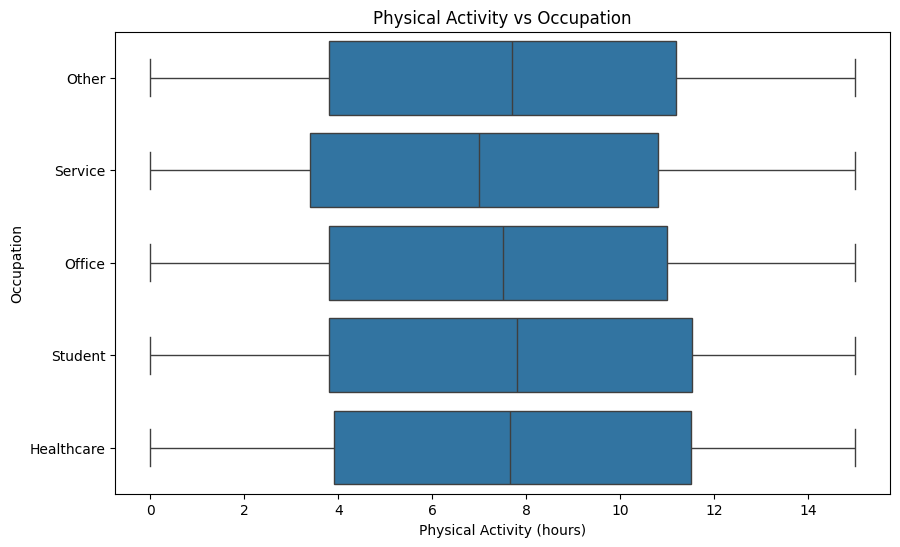

In [11]:
# Create boxplot to see correlation between phisical activity and occtupation distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Physical_Activity_Hours'], y=data['Occupation'])
plt.title('Physical Activity vs Occupation')
plt.xlabel('Physical Activity (hours)')
plt.ylabel('Occupation')

   * Average **6–8 hours/week** across all jobs.
   * Students show wider variation, with some reporting **very high activity**.

## 4.9 Health issue distribution

Text(0.5, 1.0, 'Health Issue Distribution')

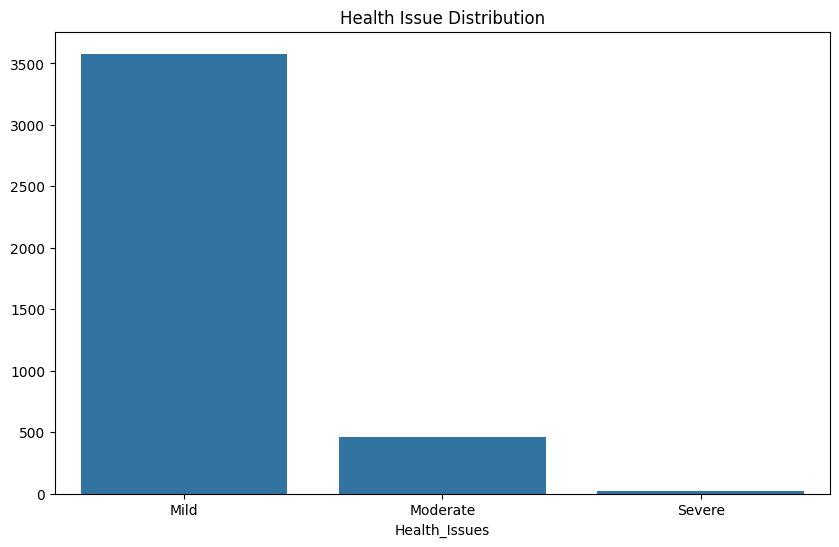

In [12]:
# Create health issue distribution using Barchart
health_issue_counts = data['Health_Issues'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=health_issue_counts.index, y=health_issue_counts.values)
plt.title('Health Issue Distribution')

   * Most report **“Mild”** issues.
   * Very few **“Moderate”** and almost no **“Severe”** cases.

## 4.10 Smoking x Alcohol Consumption

Text(0, 0.5, 'Count')

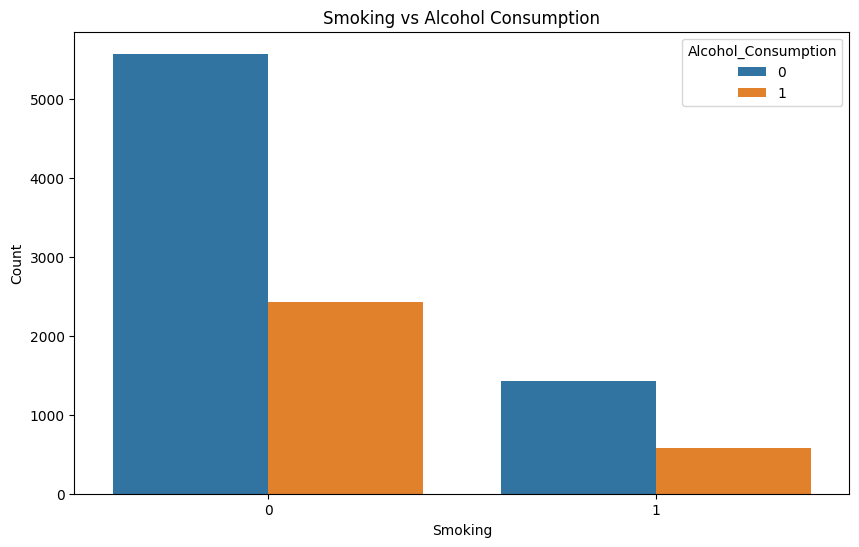

In [13]:
# Use group bar chart to see Smoking and Alcohol Consumption
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Smoking'], hue=data['Alcohol_Consumption'])
plt.title('Smoking vs Alcohol Consumption')
plt.xlabel('Smoking')
plt.ylabel('Count')

   * Majority are **non-smokers**.
   * Both smokers and non-smokers exist in alcohol (yes/no), but overall alcohol consumption is lower.

# 5. Feature Engineering

## 5.1 Missing Value

In [14]:
# Check missing value of the data
missing_values = data.isnull().sum()
print(missing_values)

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


In [15]:
missing_percentage = data['Health_Issues'].isnull().sum() / len(data) * 100
print(f"Percentage of missing values in 'Health_Issues': {missing_percentage:.2f}%")

# Since the percentage is high, impute with a new category 'None'.
data['Health_Issues'] = data['Health_Issues'].fillna('None')

# Verify that there are no remaining missing values in the 'Health_Issues' column.
missing_values_after_imputation = data.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)

Percentage of missing values in 'Health_Issues': 59.41%

Missing values after imputation:
ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64


## 5.2 Data Encoding

In [16]:
categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
display(data_encoded.head())

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Health_Issues_Moderate,Health_Issues_None,Health_Issues_Severe,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,3.5,328.1,7.5,24.9,78,14.5,0,0,...,False,True,False,False,True,False,False,True,False,False
1,2,33,1.0,94.1,6.2,20.0,67,11.0,0,0,...,False,True,False,False,True,False,False,False,True,False
2,3,42,5.3,503.7,5.9,22.7,59,11.2,0,0,...,False,False,True,False,False,False,True,False,False,False
3,4,53,2.6,249.2,7.3,24.7,71,6.6,0,0,...,False,True,False,False,False,False,False,True,False,False
4,5,32,3.1,298.0,5.3,24.1,76,8.5,0,1,...,False,False,True,False,False,False,False,False,False,True


## 5.3 Data Scalling

In [17]:
numerical_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('ID')

scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

display(data_encoded.head())

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Health_Issues_Moderate,Health_Issues_None,Health_Issues_Severe,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,0.452574,0.683207,0.651138,0.706861,0.233766,0.751563,1.625265,-0.500625,-0.655745,...,False,True,False,False,True,False,False,True,False,False
1,2,-0.174645,-1.040723,-1.047691,-0.356974,-1.020645,-0.368319,0.814134,-0.500625,-0.655745,...,False,True,False,False,True,False,False,False,True,False
2,3,0.631779,1.924437,1.925986,-0.602474,-0.329439,-1.182779,0.860485,-0.500625,-0.655745,...,False,False,True,False,False,False,True,False,False,False
3,4,1.617409,0.062592,0.078328,0.543194,0.182565,0.038911,-0.205573,-0.500625,-0.655745,...,False,True,False,False,False,False,False,True,False,False
4,5,-0.264247,0.407378,0.432613,-1.093475,0.028964,0.547948,0.234755,-0.500625,1.524983,...,False,False,True,False,False,False,False,False,False,True


# 6. Model

## 6.1 clustering algorithm (e.g., K-Means) to the preprocessed data.


In [18]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(data_encoded.drop('ID', axis=1))

data['Cluster'] = kmeans.labels_
display(data.head())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Cluster
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0,2
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,1
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,2
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,1


Calculate the silhouette score to evaluate the clustering result.

Silhouette Score: 0.09236365879245519


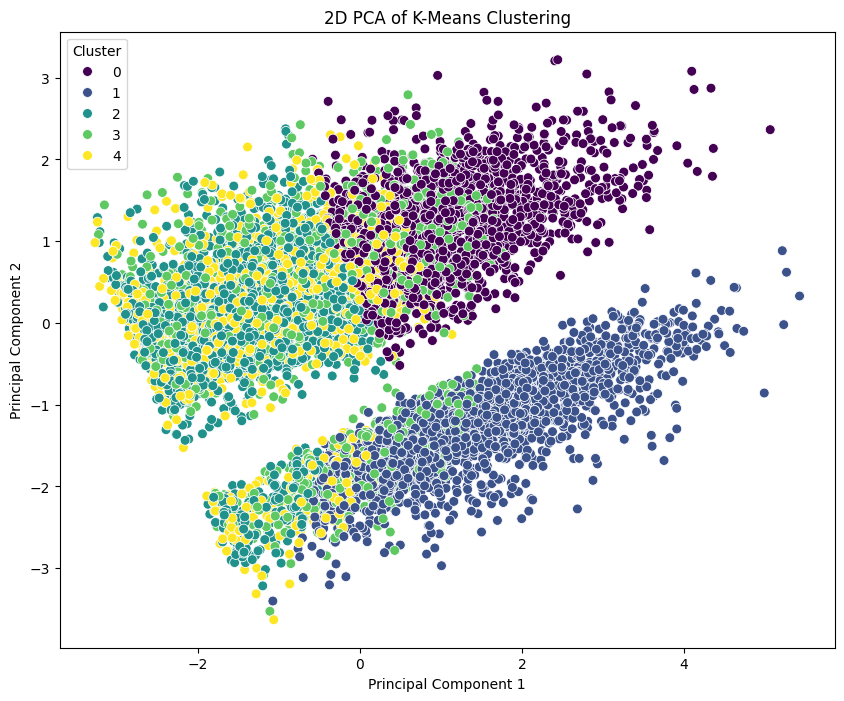

In [19]:
silhouette_avg = silhouette_score(data_encoded.drop('ID', axis=1), data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_encoded.drop('ID', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
principal_df['Cluster'] = data['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="principal_component_1", y="principal_component_2", hue="Cluster", data=principal_df, palette='viridis', s=50
)
plt.title('2D PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 7. Analysis:

### Data Analysis Key Findings

*   The 'Health\_Issues' column initially had a high percentage of missing values (59.41%), which were imputed with the category 'None'.
*   Categorical features ('Gender', 'Country', 'Sleep\_Quality', 'Stress\_Level', 'Health\_Issues', 'Occupation') were successfully converted into numerical dummy variables.
*   Numerical features (excluding 'ID') were scaled using `StandardScaler` to ensure they have a similar range.
*   K-Means clustering was applied with 5 clusters, and the resulting cluster labels were added to the original dataset.
*   The silhouette score for the clustering was approximately 0.092, indicating that the clusters are not well-separated.
*   A 2D PCA visualization of the clusters showed significant overlap between the clusters, supporting the low silhouette score.

### Insights or Next Steps

*   The low silhouette score and overlapping clusters suggest that the current clustering solution with 5 clusters may not be optimal. Further analysis could involve exploring different numbers of clusters using methods like the elbow method or analyzing the characteristics of each cluster to understand if they represent meaningful segments.
*   Consider exploring alternative clustering algorithms or dimensionality reduction techniques to potentially improve cluster separation and interpretability.


In [20]:
# Analyze the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').agg(
    Mean_Age=('Age', 'mean'),
    Mean_Coffee_Intake=('Coffee_Intake', 'mean'),
    Mean_Sleep_Hours=('Sleep_Hours', 'mean'),
    Mean_BMI=('BMI', 'mean'),
    Mean_Heart_Rate=('Heart_Rate', 'mean'),
    Mean_Physical_Activity_Hours=('Physical_Activity_Hours', 'mean'),
    Gender_Distribution=('Gender', lambda x: x.value_counts().to_dict()),
    Sleep_Quality_Distribution=('Sleep_Quality', lambda x: x.value_counts().to_dict()),
    Stress_Level_Distribution=('Stress_Level', lambda x: x.value_counts().to_dict()),
    Health_Issues_Distribution=('Health_Issues', lambda x: x.value_counts().to_dict()),
    Occupation_Distribution=('Occupation', lambda x: x.value_counts().to_dict()),
    Smoking_Distribution=('Smoking', lambda x: x.value_counts().to_dict()),
    Alcohol_Consumption_Distribution=('Alcohol_Consumption', lambda x: x.value_counts().to_dict())
).reset_index()

display(cluster_analysis)

,Cluster,Mean_Age,Mean_Coffee_Intake,Mean_Sleep_Hours,Mean_BMI,Mean_Heart_Rate,Mean_Physical_Activity_Hours,Gender_Distribution,Sleep_Quality_Distribution,Stress_Level_Distribution,Health_Issues_Distribution,Occupation_Distribution,Smoking_Distribution,Alcohol_Consumption_Distribution
0,0,34.496372,3.911611,7.088002,23.886889,71.624093,7.554136,"{'Female': 1018, 'Male': 1002, 'Other': 47}","{'Good': 1786, 'Excellent': 281}",{'Low': 2067},"{'None': 1787, 'Mild': 268, 'Moderate': 12}","{'Healthcare': 431, 'Other': 425, 'Student': 4...","{0: 1946, 1: 121}","{0: 1698, 1: 369}"
1,1,34.654272,3.356884,5.161709,23.882913,71.502877,7.528730,"{'Female': 1113, 'Male': 1104, 'Other': 42}","{'Fair': 1467, 'Poor': 792}","{'Medium': 1467, 'High': 792}","{'Mild': 1943, 'Moderate': 309, 'Severe': 7}","{'Service': 476, 'Other': 470, 'Office': 458, ...","{0: 2012, 1: 247}","{0: 1654, 1: 605}"
2,2,35.423939,1.343675,7.194596,24.018855,69.567254,7.568415,"{'Female': 1268, 'Male': 1171, 'Other': 59}","{'Good': 1711, 'Excellent': 561, 'Fair': 184, ...","{'Low': 2272, 'Medium': 184, 'High': 42}","{'None': 1907, 'Mild': 549, 'Moderate': 39, 'S...","{'Office': 527, 'Healthcare': 520, 'Other': 49...",{0: 2498},{0: 2498}
3,3,34.732885,2.099267,6.863447,24.136125,70.395477,7.406663,"{'Female': 858, 'Male': 746, 'Other': 32}","{'Good': 1038, 'Fair': 261, 'Excellent': 254, ...","{'Low': 1292, 'Medium': 261, 'High': 83}","{'None': 1097, 'Mild': 468, 'Moderate': 67, 'S...","{'Student': 345, 'Office': 335, 'Other': 334, ...",{1: 1636},"{0: 1143, 1: 493}"
4,4,35.448701,1.709675,7.045649,24.063052,69.909091,7.289221,"{'Male': 750, 'Female': 744, 'Other': 46}","{'Good': 1102, 'Excellent': 256, 'Fair': 138, ...","{'Low': 1358, 'Medium': 138, 'High': 44}","{'None': 1150, 'Mild': 351, 'Moderate': 36, 'S...","{'Office': 350, 'Student': 315, 'Other': 311, ...",{0: 1540},{1: 1540}


## Cluster Analysis Summary

Here's a summary of the characteristics of each of the 5 clusters based on the analysis above:

*   **Cluster 0:** This cluster has a moderate mean age and coffee intake. They tend to have good sleep quality and low stress levels. The majority of this cluster reports no health issues.
*   **Cluster 1:** This cluster is characterized by a slightly lower mean sleep duration and a higher proportion of individuals reporting fair to poor sleep quality and medium to high stress levels. They also show a higher prevalence of mild to moderate health issues.
*   **Cluster 2:** This cluster has the lowest mean coffee intake and caffeine consumption. They generally have good sleep quality and low stress levels, with a significant portion reporting no health issues.
*   **Cluster 3:** This cluster has a moderate mean coffee intake and sleep duration. They show a mix of stress levels and health issues, with a notable proportion of smokers.
*   **Cluster 4:** This cluster has a relatively low mean coffee intake and caffeine consumption, similar to Cluster 2. They tend to have good sleep quality and low stress, but a higher proportion of individuals in this cluster report alcohol consumption compared to other clusters.

**Next Steps:**

While we have analyzed the characteristics of each cluster, the silhouette score was relatively low, suggesting that the clusters are not very well-separated.

Here are a few potential next steps to further explore and potentially improve the clustering:

1.  **Explore different numbers of clusters:** Use methods like the elbow method to determine if a different number of clusters would yield better separation.
2.  **Try other clustering algorithms:** Experiment with alternative clustering algorithms (e.g., DBSCAN, Agglomerative Clustering) to see if they produce more distinct clusters.
3.  **Feature Selection/Engineering:** Consider if there are other ways to engineer or select features that might improve the clustering results.
4.  **In-depth Cluster Profiling:** Dive deeper into the characteristics of each cluster to understand the underlying reasons for the observed patterns.